In [1]:
%matplotlib inline

import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

print('Version Information:\n')
print('python: {}'.format(sys.version))
print('matplotlib: {}'.format(matplotlib.__version__))
print('numpy: {}'.format(np.__version__))
print('seaborn: {}'.format(sns.__version__))

Version Information:

python: 3.8.3 (v3.8.3:6f8c8320e9, May 13 2020, 16:29:34) 
[Clang 6.0 (clang-600.0.57)]
matplotlib: 3.2.2
numpy: 1.18.5
seaborn: 0.11.0


## Extra Pre-processing due to slight mistake in data preprocessing

In [2]:
pd.set_option('display.max_columns', None)
df_ocm = pd.read_csv("/Users/xuxinjing/Documents/Stanford/Classes/CS 229/Project/Data/OCM_one_hot.csv")

In [3]:
df_ocm2 = df_ocm.copy()
for i in range(0, len(df_ocm2['Contact time, s'])):
    #print(i)
    time = df_ocm2['Contact time, s'][i]
    if isinstance(time, str):
        time = time.strip()
    if isinstance(time, str) and '*' in time:
        sci_note = time.split('*')
        sci_note[0] = pd.to_numeric(sci_note[0])
        base, exp = sci_note[1].split('-')
        time = sci_note[0] * pd.to_numeric(base).astype(float)**(-pd.to_numeric(exp))
    df_ocm2['Contact time, s'][i] = time
df_ocm2['Contact time, s'] = pd.to_numeric(df_ocm2['Contact time, s'])
# df_ocm2.iloc[833][156]

<ipython-input-3-f3139ae8f0dc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ocm2['Contact time, s'][i] = time


In [4]:
df = df_ocm2.copy()
# df.isna().sum()

In [5]:
# sns.pairplot(train_dataset[['Li', 'Support_Al', 'Promotor_Cl', 'p(CH4), bar']], diag_kind='kde')

# Neural Network Model

In [5]:
# split into input (X) and output (Y) variables
Y = df['Y(C2),%'].to_numpy()
X = df.drop(columns=['Y(C2),%']).to_numpy()
print(X.shape)

(1866, 157)


### Hyperparameter search

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0, shuffle=True)

cv = KFold(n_splits=10, random_state=10, shuffle=True)
def NN(hidden_layer_sizes=(150,128,64,32,46), 
       lr_init=0.01, 
       alpha=0.1, 
       solver='adam', 
       learning_rate='constant'):
    # create model
    model = MLPRegressor(hidden_layer_sizes=hidden_layer_sizes,
                         learning_rate_init=lr_init,
                         random_state=1, 
                         max_iter=5000, 
                         verbose=0, 
                         solver=solver,
                         alpha=alpha,
                         shuffle=False,
                         learning_rate=learning_rate)
    # evaluate model
    scores = cross_val_score(model, X_train, Y_train, scoring="neg_mean_squared_error", cv=cv)
    # report performance
    print('hidden_layer_sizes{}\n lr_init={}\n alpha={}\n'.format(hidden_layer_sizes, lr_init, alpha))
    print('solver is: {}'.format(solver))
    print('Cross-validated scores:', scores)
    #predictions = cross_val_predict(model, X_test, Y_test, cv=cv)
    return model

def hyperparam_search():
    hidden_layer_sizes = [(150,128,64,32,46),
                         (150,128,64,32,46),
                         (150,150,64,32,46),
                         (150,128,150,32,46),
                         (150,128,64,64,46)]
    lr_inits=[0.001, 0.01, 0.1]
    alphas = [0.01, 0.1, 0.5]
    for hl in hidden_layer_sizes:
        for lr_init in lr_inits:
            for alpha in alphas:
                NN(hidden_layer_sizes=hl, 
                                 lr_init=lr_init, 
                                 alpha=alpha)

In [13]:
hyperparam_search()

hidden_layer_sizes(150, 128, 64, 32, 46)
 lr_init=0.001
 alpha=0.01

solver is: adam
Cross-validated scores: [   -32.07367749    -35.61293589    -46.19986133    -38.67881933
 -12110.22190461   -102.25331117    -36.42701623   -167.51232893
    -93.36843408    -36.8599891 ]
hidden_layer_sizes(150, 128, 64, 32, 46)
 lr_init=0.001
 alpha=0.1

solver is: adam
Cross-validated scores: [-3.72141146e+01 -3.89589436e+01 -4.89329613e+01 -3.25434406e+01
 -1.29447355e+05 -5.19714260e+01 -3.73496408e+01 -1.15988233e+02
 -3.72158425e+01 -3.59103036e+01]
hidden_layer_sizes(150, 128, 64, 32, 46)
 lr_init=0.001
 alpha=0.5

solver is: adam
Cross-validated scores: [   -54.3714854     -37.84670476    -52.43442048    -41.52705111
 -12887.63143341    -46.44046484    -35.68528567   -888.86382325
    -70.37417713    -54.14298   ]
hidden_layer_sizes(150, 128, 64, 32, 46)
 lr_init=0.01
 alpha=0.01

solver is: adam
Cross-validated scores: [-35.56438687 -62.58485721 -39.44769174 -50.76142255 -36.47925682
 -31.8519

hidden_layer_sizes(150, 128, 150, 32, 46)
 lr_init=0.1
 alpha=0.01

solver is: adam
Cross-validated scores: [-150.74247733  -47.9932126   -50.19061646  -90.83160177  -42.58619778
 -112.2918648   -46.74022732  -71.65870592  -37.52542267  -41.34840032]
hidden_layer_sizes(150, 128, 150, 32, 46)
 lr_init=0.1
 alpha=0.1

solver is: adam
Cross-validated scores: [ -41.11216181  -48.02430813  -95.82697494  -46.40858927  -42.49447351
  -50.1278439  -283.4854349  -877.27793504  -89.02233679  -41.37623981]
hidden_layer_sizes(150, 128, 150, 32, 46)
 lr_init=0.1
 alpha=0.5

solver is: adam
Cross-validated scores: [ -41.09937224 -117.43901387  -50.19081797  -46.15663879  -41.60057656
 -138.41161133  -48.74615932 -170.74377488  -37.47491758  -41.71484683]
hidden_layer_sizes(150, 128, 64, 64, 46)
 lr_init=0.001
 alpha=0.01

solver is: adam
Cross-validated scores: [-4.18747099e+01 -6.66525833e+01 -4.81171076e+01 -5.64272797e+01
 -7.60931960e+04 -4.15859509e+01 -3.53244367e+01 -7.65339169e+03
 -4.998435

### Final Model with parameters

hidden_layer_sizes(150, 128, 64, 32, 46)
 lr_init=0.01
 alpha=0.5

solver is: adam
Cross-validated scores: [-45.72370307 -37.24041744 -49.08749316 -35.92791475 -33.12361017
 -29.30460123 -49.40844675 -27.47258734 -33.61947643 -31.22960311]
Mean squared error(train): 25.43
Mean squared error(test): 32.14
Coefficient of determination: 0.26


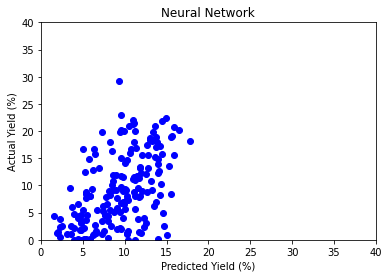

In [7]:
model = NN(hidden_layer_sizes=(150, 128, 64, 32, 46), lr_init=0.01, alpha=0.5)
model.fit(X_train, Y_train)
yield_y_train_pred = model.predict(X_train)
yield_y_pred = model.predict(X_test)
train_normalized_error = mean_squared_error(Y_train, yield_y_train_pred)
test_normalized_error = mean_squared_error(Y_test, yield_y_pred)
print('Mean squared error(train): %.2f'% train_normalized_error)
print('Mean squared error(test): %.2f'% test_normalized_error)
print('Coefficient of determination: %.2f'% r2_score(Y_test, yield_y_pred))

plt.scatter(yield_y_pred, Y_test,  color='blue')
plt.xlabel("Predicted Yield (%)")
plt.ylabel("Actual Yield (%)")
plt.xlim([0,40])
plt.ylim([0,40])
plt.title("Neural Network")
plt.show()

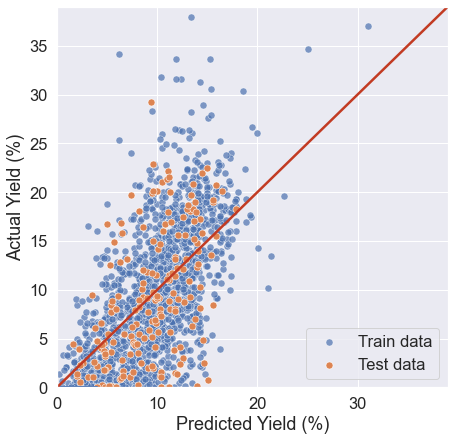

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

def make_nice_plots(Y_test, Y_pred, Y_train, Y_train_pred, model='Neural Network'):
    '''
    Model: class string, represents name of the model
    Y_test: ndarray of test labels
    Y_pred: ndarray of predicted test labels
    Y_train: ndarray of train labels
    Y_pred_train: ndarray of predicted train labels
    '''
    result1 = pd.DataFrame(columns = ['Prediction','Actual','Type'])
    result2 = pd.DataFrame(columns = ['Prediction','Actual','Type'])
    result1['Prediction'] = Y_train_pred
    result1['Actual'] = Y_train
    result1['Type'] = 'Train'
    result2['Prediction'] = Y_pred
    result2['Actual'] = Y_test
    result2['Type'] = 'Test'
    result = result1.append(result2)
    sns.set_theme(context='notebook', style='darkgrid', palette='deep', font_scale=1)
    #sns.set_context("paper")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    sns.color_palette("Set2")
    pal=dict(Prediction="#6495ED", Actual="#F08080")
    # Make a custom palette with gendered colors
    pal = dict(Train="#6495ED", Test="#F08080")
    
    
    fig, ax = plt.subplots()
    sns.axes_style("whitegrid")
        
    g1 = sns.scatterplot(data=result1[['Prediction', 'Actual']], x="Prediction", y="Actual", s = 50, ax=ax, alpha=0.7)
    g2 = sns.scatterplot(data=result2[['Prediction', 'Actual']], x="Prediction", y="Actual", s = 50, ax=ax, alpha=1)
    # Show the survival probability as a function of age and sex
    
    plt.xlabel("Predicted Yield (%)")
    plt.ylabel("Actual Yield (%)")
    plt.legend(loc=4, labels=['Train data', 'Test data'])
    plt.plot([0, 4], [0, 0], linewidth=2)
    max_Y = max([max(Y_test), max(Y_pred), max(Y_train), max(Y_train_pred)]) + 1
    plt.ylim([0,max_Y])
    plt.xlim([0,max_Y])
    diag = [0.0, max_Y]
    plt.plot(diag,diag,'-',color="#C23B23")
    fig.set_size_inches(7, 7)
    fig.savefig("{}.png".format(model), dpi=512)
make_nice_plots(Y_test, yield_y_pred, Y_train, yield_y_train_pred, model='Neural Network')    

In [13]:
make_nice_plots(Y_test, yield_y_pred, Y_train, yield_y_train_pred, model='Neural Network').head()

,Prediction,Actual,Type
0,8.220495,7.9500,Train
1,8.619596,7.4918,Train
2,5.006907,7.8570,Train
3,11.243285,9.9000,Train
4,10.418034,9.1000,Train
